## Logistic Regression - Lesson 4

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [185]:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

Check the data shape, size, and quality

In [186]:
new_pumpkins
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
23            0        4        4       4          4      0
24            0        4        4       4          4      0
25            0        4        4       4          2      0
26            0        4        4       4          4      0
87            0        0        8       4          3      0
...         ...      ...      ...     ...        ...    ...
1689          7        4        4       3          2      0
1690          7        4        4       3          3      0
1691          7        4        4       6          6      0
1692          7        4        4       6          2      0
1693          7        4        4       6          3      0

[586 rows x 6 columns]>

Working with Item Size to Color, create a scatterplot 

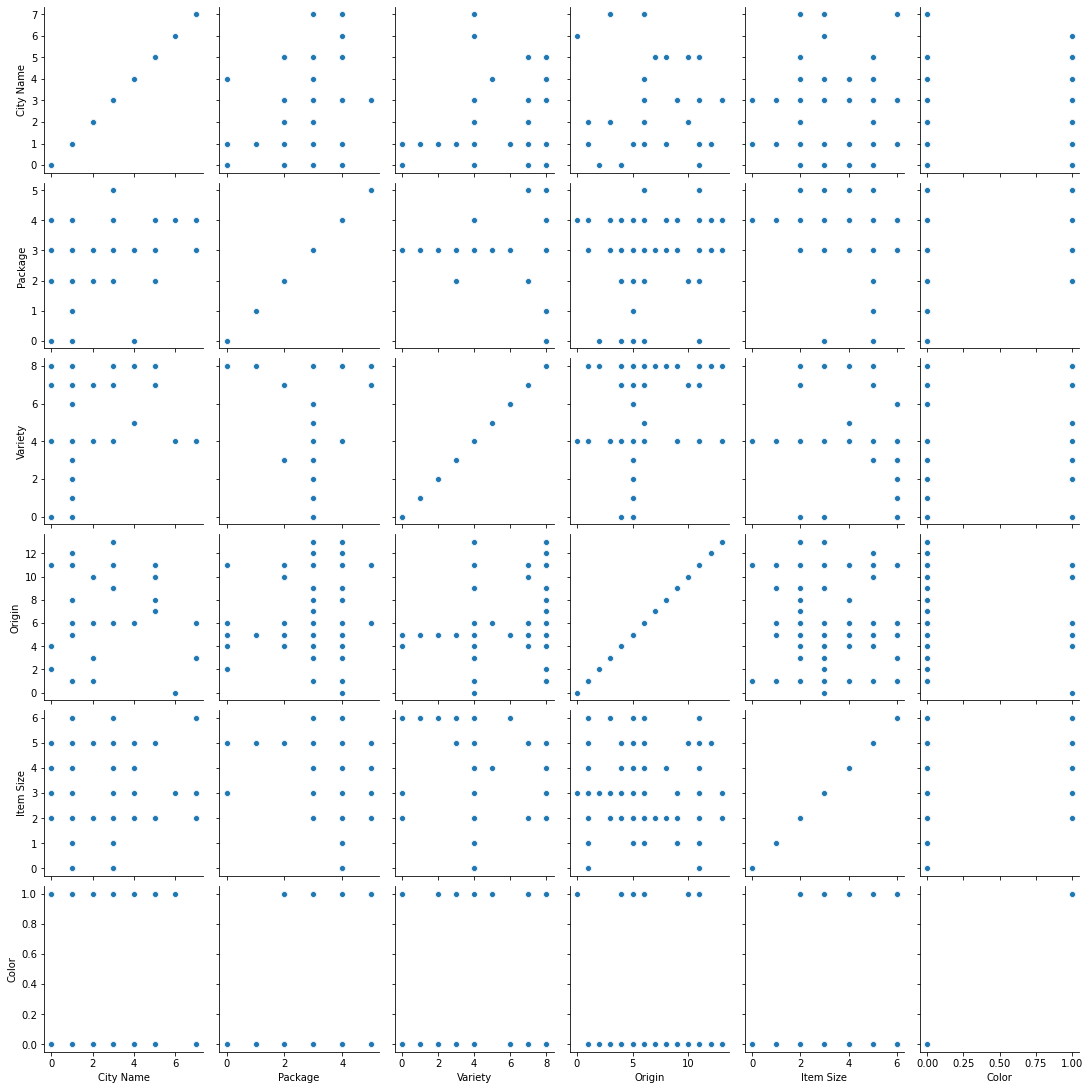

In [187]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)


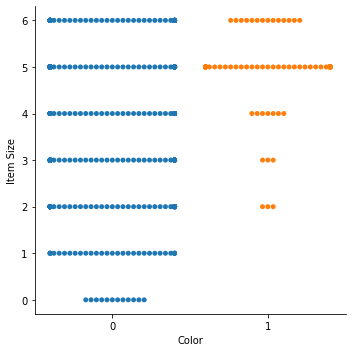

In [188]:
sns.catplot(x="Color", y="Item Size", kind="swarm", data=new_pumpkins)

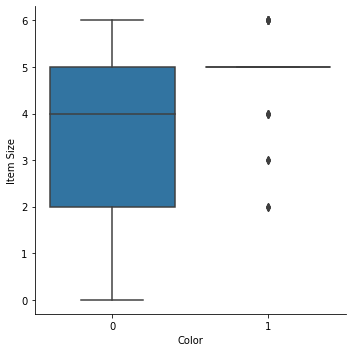

In [189]:
sns.catplot(x="Color", y="Item Size",  kind="box", data=new_pumpkins)

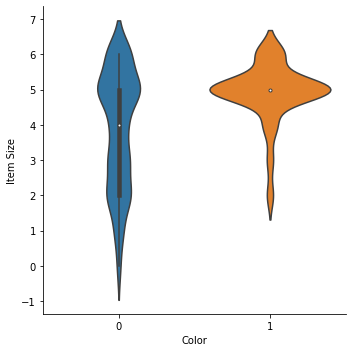

In [190]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)